# Acknowledgement

Parts of this pset were inspired by
* Berkeley CS294-158, taught by Pieter Abbeel, Wilson Yan, Kevin Frans, and Philipp Wu;
* MIT 6.S184/6.S975, taught by Peter Holderrieth and Ezra Erives;
* The [blog post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) about diffusion models by Lilian Weng.




# Submission Guideline for Part 2

Please include your answer to all problems, including formulas, proofs, and the figures generated in each problem, excluding code. You are required to submit the (single) pdf and all (four) notebooks (one for each problem) with your code and running outputs. Do not include code in the pdf file. 

Specifically, for Problem 1 in this notebook, the pdf should contain:
- Formulas and proofs for problem 1.1 and 1.2
- 4 figures, one for each beta schedule for problem 1.3
- Answers to the 2 short answer questions about different beta schedules in problem 1.3

# Problem 1: Preliminary and Math Preparations
In this problem, we will revisit some of the essential math derivations of diffusion models from the probabilistic perspective (referring to the [DDPM; Ho *et al.*, 2020](https://arxiv.org/pdf/2006.11239) paper). You will not need to use GPUs for this problem.

*Hint*: a careful reading of the [blog post](https://lilianweng.github.io/posts/2021-07-11-diffusion-models/) by Lilian Weng should reveal all of these questions

## 1.1 Diffusion Forward Process
Denote the target data distribution as $q(x)$. For each data point $x_0 \sim q(x)$, we can define a forward diffusion process where Gaussian noises are added to the sampling over $T$ steps as a Markov chain with a variance schedule $\beta_1,...,\beta_T \, (\beta_i\in (0,1), \forall \, i\in \{1,...,T\})$. This leads to $T$ latent variables $x_1,...,x_T$ following the distribution $q(x_{1:T}|x_0)$, defined as:
$$q(x_{1:T}|x_0):=\prod_{t=1}^T q(x_t|x_{t-1}), \ \ q(x_t|x_{t-1}):= \mathcal{N}(x_t; \sqrt{1-\beta_t}x_{t-1},\beta_t \mathbf{I})$$

Let $\alpha_t:=1-\beta_t$ and $\bar{\alpha_t}:=\prod_{i=1}^t \alpha_i$. Please fill in the formula of distributions below with a brief proof:

1) From the previous equation, replace 1-$\beta_T$ and the the product of a

2) to get distribution in terms of $x_0$ the entire process is still gaussian and can keep combing the steps. Using the reparametertization trick in a recursive way.

3) Finally we reach the below answer 

(1) $q(x_t|x_0)$ = $ \mathcal{N}(x_t; \sqrt{\bar{\alpha}_t} \, x_0, (1 - \bar{\alpha}_t) \, \mathbf{I})$

*Hint*: 
- One proof approach involves using the [reparameterization trick](https://en.wikipedia.org/wiki/Reparameterization_trick), i.e. normal distribution $z \sim N(\mu,\sigma^2)$ can be written as $z=\mu+\sigma \epsilon$, where $\epsilon\sim N(0,1)$ is a standard normal distribution.
- The summation of two Gaussians, $\mathcal{N}(\mu_1,\sigma_1^2 \mathbf{I})$ and $\mathcal{N}(\mu_2,\sigma_2^2 \mathbf{I})$, has the distribution $\mathcal{N}(\mu_1+\mu_2,(\sigma_1^2+\sigma_2^2) \mathbf{I})$.

1) Using the answer from problem 1.1, we know that $beta_t$ > c > 0 for infiinteily amount of t's 
2) that means that A bar approaches 0 when t goes to infinity 
3) The mean term also approaches 0 and the variance term will apporach 1 

(2) $\lim_{T \rightarrow \infty} q(x_T)$ = $\mathcal{N}(0, \mathbf{I})$

(You only need to consider normal schedules $\{\beta_t\}_{t=1}^T$, i.e. you can assume that there exists infinite number of $t$ such that $\beta_t>c$ where $c$ is a constant and $c>0$.)

## 1.2 Reverse Diffusion Process
By reversing the above process and sample from $q(x_{t-1}|x_t)$, we can get samples from the target data distribution $q(x_0)$ by sampling from the simple distribution $q(x_T)$. However, the distribution is not directly tractable, and we need to train a model to approximate the conditional probabilities.

However, the reverse probability is *tractable* when *conditioned on $x_0$*:
$$q(x_{t-1}|x_t,x_0)=\mathcal{N}(x_{t-1};\tilde{\mu}_t(x_t,x_0), \tilde{\beta_t} \mathbf{I})$$

Please fill in the formula of distributions below with a brief proof. Write the formulas using (part of) the variables $\alpha_t$, $\alpha_{t-1}$, $\beta_t$, $\beta_{t-1}$,  $\bar{\alpha_t}$, $\bar{\alpha}_{t-1}$ and simplify the expression as much as you can. 

*Hint* for (3) and (4): use the Bayes' theorem.

Using the variance of the recverse process while conditioning it on the x_0
(3) $\tilde{\beta_t}$ = $\frac{1 -\bar{\alpha}_{(t-1)}}{1 -\bar{\alpha}_t} \beta_t$

mean of the reverse process -. linear combo of x_t an d x_o
(4) Denote $\tilde{\mu}_t(x_t,x_0)=A \cdot x_t + B \cdot x_0$,
then 
$A$ = $\frac{\sqrt{\alpha_t} (1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t}, \quad$
$B$ = $\frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{1 - \bar{\alpha}_t}$

(5) Using the distribution derived in (1) and the reparameterization trick, express $x_0$ as a combination $x_t$ and a Gaussian noise $\epsilon_t$: 
$x_0$ = $\frac{1}{\sqrt{\bar{\alpha}_t}} \left( x_t - \sqrt{1 - \bar{\alpha}_t} \, \epsilon_t \right)$

(6) Using the expression of $x_0$ in (5) to replace the $x_0$ in (4), $\tilde{\mu}_t$ can be written as a combination of $x_t$ and $\epsilon_t$: $\tilde{\mu}_t(x_t,\epsilon_t) = A' \cdot x_t + B' \cdot \epsilon_t$. Then rewriting it

Then $A'$ = $\frac{\sqrt{\alpha_t} (1 - \bar{\alpha}_{t-1})}{1 - \bar{\alpha}_t} + \frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t}{\sqrt{\bar{\alpha}_t} (1 - \bar{\alpha}_t)}, \quad$

$B'$ = $-\frac{\sqrt{\bar{\alpha}_{t-1}} \beta_t \sqrt{1 - \bar{\alpha}_t}}{\bar{\alpha}_t (1 - \bar{\alpha}_t)}$

## 1.3 Analyzing Different Variance Schedules
The variance schedule is one of the essential components to design for diffusion models. For 

(1) linear ($\beta_t=t/T$)

(2) polynomial ($\beta_t=(t/T)^3$) 

(3) cosine ($\beta_t=1-cos(\frac{\pi}{2}\cdot \frac{t}{T})$) 

schedules of $\beta_t$ respectivaly, generate plots with y-axis being the value of $\beta_t$ and $1-\bar{\alpha_t}$ and x-axis being the diffusion step $t/T$ and use $T=30$. Comparing the two schedules and based on the formula of $q(x_t|x_0)$ in (1)

what can you say about their impact to the diffusion training?

The linear schedule will add steady noise, however it may add a lot noise in the earlier stages. The polynoiaml schedule is a little different, adding noise slowly at the start and adding more in the latter part, and is good for learning complex data. The cosine schedule is a lot more smooth with adding noise at both the start and the end, coud have more stable trainig and higher quality. 

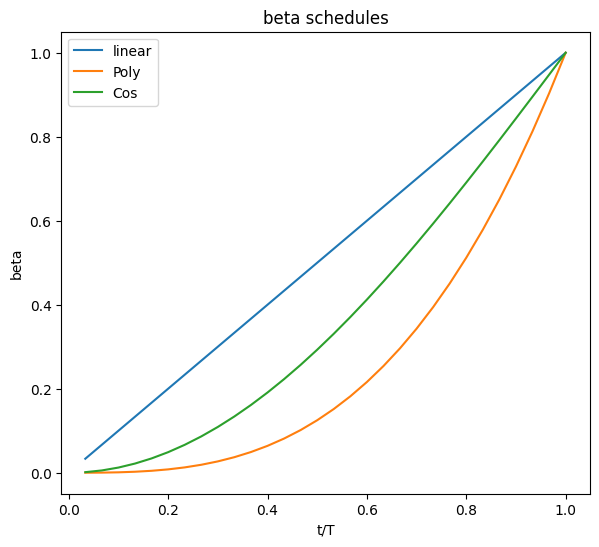

In [10]:
### write your code here
import numpy as np 
import matplotlib.pyplot as plt 

## setting up 
T = 30
t = np.arange(1, T+1)
# for x axs
t_norm = t/T
## helper function to find 1-baralpha 
def helper(beta): 
    alpha = 1 - beta
    alpha_bar = np.cumprod(alpha)
    return 1-alpha_bar
# the beta schedules 
linear_beta = t_norm
poly_beta = t_norm ** 3
cosine_beta = 1 - np.cos((np.pi / 2) * t_norm)
# the alpha schedules 
linear_alpha = helper(linear_beta)
poly_alpha = helper(poly_beta)
cosine_alpha = helper(cosine_beta)

## generating plots 
plt.figure(figsize=(15, 6))
## the betas 
plt.subplot(1, 2, 1)
plt.plot(t_norm, linear_beta, label="linear")
plt.plot(t_norm, poly_beta ,label="Poly")
plt.plot(t_norm, cosine_beta, label="Cos")
plt.title("beta schedules")
plt.xlabel("t/T")
plt.ylabel("beta")
plt.legend()
## final 
plt.show()

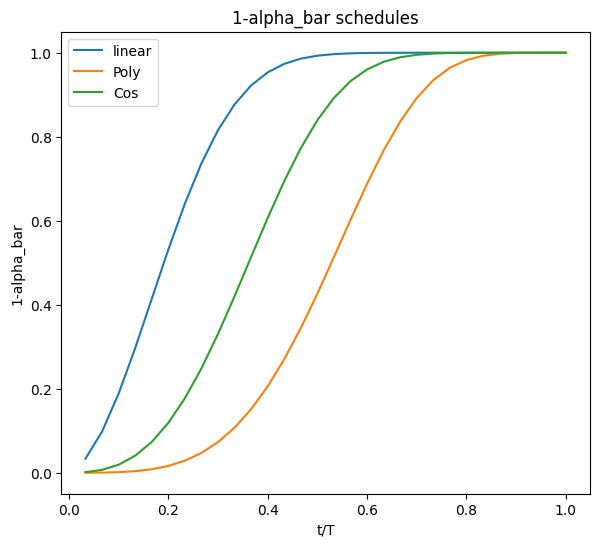

In [11]:
### write your code here
import numpy as np 
import matplotlib.pyplot as plt 

## setting up 
T = 30
t = np.arange(1, T+1)
# for x axs
t_norm = t/T
## helper function to find 1-baralpha 
def helper(beta): 
    alpha = 1 - beta
    alpha_bar = np.cumprod(alpha)
    return 1-alpha_bar
# the beta schedules 
linear_beta = t_norm
poly_beta = t_norm ** 3
cosine_beta = 1 - np.cos((np.pi / 2) * t_norm)
# the alpha schedules 
linear_alpha = helper(linear_beta)
poly_alpha = helper(poly_beta)
cosine_alpha = helper(cosine_beta)

## generating plots 
plt.figure(figsize=(15, 6))

## the alphas 
plt.subplot(1, 2, 1)
plt.plot(t_norm, linear_alpha, label="linear")
plt.plot(t_norm, poly_alpha ,label="Poly")
plt.plot(t_norm, cosine_alpha, label="Cos")
plt.title("1-alpha_bar schedules")
plt.xlabel("t/T")
plt.ylabel("1-alpha_bar")
plt.legend()


## final 
plt.show()

Based on the observations, [Nichol and Dhariwal, 2021](https://arxiv.org/pdf/2102.09672) proposed to construct a different noise schedule in terms of $\bar{\alpha_t}$:
$$\bar{\alpha_t}= \frac{f(t)}{f(0)}, f(t) = \cos(\frac{t/T+s}{1+s} \cdot \frac{\pi}{2})^2$$

For this schedule, generate plots with y-axis being the value of $\beta_t$ and $1-\bar{\alpha_t}$ and x-axis being the diffusion step $t/T$, and use $s=0.008$ and $T=30$. 

How does this schedule differ from the previous two, and why might it lead to improved performance in the trained diffusion models?

The schedule differes from the previous two because this cosine based schedule allows control of cumulative noise more easily that makes it smoother and more precise. It makes sure that there's a lot less noise at the beginning and at the end in case there are any spikes. It lead to improved performance in the trained diffusion models because it helps the model have cleaner learning signal and learn the data structure earlier, the smoother cumulative schdule is also better at sampling, leading to higher sample quality and also posisbly a faster convergece time. 

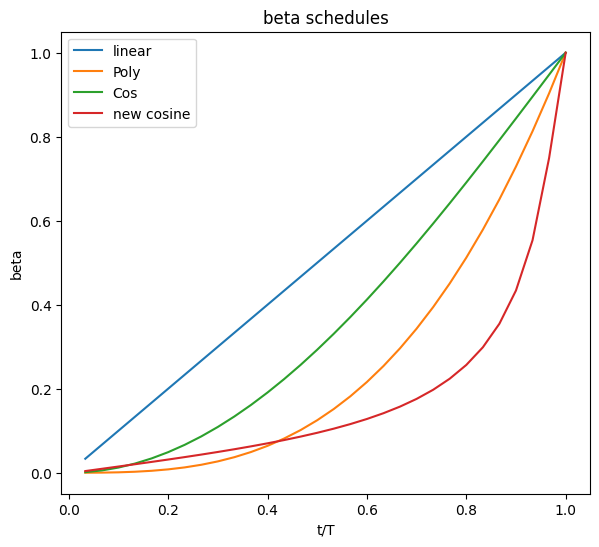

In [15]:
### write your code here
### Fgirue 3
import numpy as np 
import matplotlib.pyplot as plt 

## setting up 
T = 30
t = np.arange(1, T+1)
# for x axs
t_norm = t/T

## helper function to find 1-baralpha 
def helper(beta): 
    alpha = 1 - beta
    alpha_bar = np.cumprod(alpha)
    return 1-alpha_bar

# the beta schedules 
linear_beta = t_norm
poly_beta = t_norm ** 3
cosine_beta = 1 - np.cos((np.pi / 2) * t_norm)
# the alpha schedules 
linear_alpha = helper(linear_beta)
poly_alpha = helper(poly_beta)
cosine_alpha = helper(cosine_beta)

# nichol & dhariwal
s=0.008
t_new = np.arange(0, T + 1)/T 
f_t = np.cos((t_new + s) / (1+s) * (np.pi/2)) **2 
alpha_bar_new = f_t/ f_t[0]
alpha_new = alpha_bar_new[1:] / alpha_bar_new[:-1]
beta_new = 1 - alpha_new
alpha_bar_minus = 1 - alpha_bar_new[1:]

## generating plots 
plt.figure(figsize=(15, 6))

## the betas 
plt.subplot(1, 2, 1)
plt.plot(t_norm, linear_beta, label="linear")
plt.plot(t_norm, poly_beta ,label="Poly")
plt.plot(t_norm, cosine_beta, label="Cos")
plt.plot(t_norm, beta_new, label="new cosine")
plt.title("beta schedules")
plt.xlabel("t/T")
plt.ylabel("beta")
plt.legend()

## final 
plt.show()


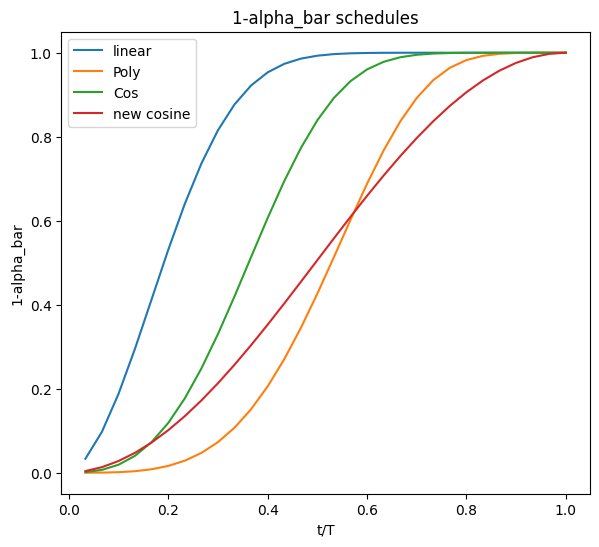

In [14]:
### Figure 4
### write your code here
### Fgirue 3
import numpy as np 
import matplotlib.pyplot as plt 

## setting up 
T = 30
t = np.arange(1, T+1)
# for x axs
t_norm = t/T

## helper function to find 1-baralpha 
def helper(beta): 
    alpha = 1 - beta
    alpha_bar = np.cumprod(alpha)
    return 1-alpha_bar

# the beta schedules 
linear_beta = t_norm
poly_beta = t_norm ** 3
cosine_beta = 1 - np.cos((np.pi / 2) * t_norm)
# the alpha schedules 
linear_alpha = helper(linear_beta)
poly_alpha = helper(poly_beta)
cosine_alpha = helper(cosine_beta)

# nichol & dhariwal
s=0.008
t_new = np.arange(0, T + 1)/T 
f_t = np.cos((t_new + s) / (1+s) * (np.pi/2)) **2 
alpha_bar_new = f_t/ f_t[0]
alpha_new = alpha_bar_new[1:] / alpha_bar_new[:-1]
beta_new = 1 - alpha_new
alpha_bar_minus = 1 - alpha_bar_new[1:]

## generating plots 
plt.figure(figsize=(15, 6))

## the alphas 
plt.subplot(1, 2, 1)
plt.plot(t_norm, linear_alpha, label="linear")
plt.plot(t_norm, poly_alpha ,label="Poly")
plt.plot(t_norm, cosine_alpha, label="Cos")
plt.plot(t_norm, alpha_bar_minus, label="new cosine")
plt.title("1-alpha_bar schedules")
plt.xlabel("t/T")
plt.ylabel("1-alpha_bar")
plt.legend()


## final 
plt.show()